<a href="https://colab.research.google.com/github/Alperenlcr/Python_and_Data_Science_Bootcamp/blob/main/Virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Task -  Virus

Bir virüs hızla yayılıyor ve sizin göreviniz virüs bulaşmış alanı duvarlar kurarak karantinaya almak. 

Dünya 2 boyutlu bir hücre dizisi olarak modellenmiştir. Burada 0, enfekte olmamış hücreleri temsil eder ve 1, virüsle kontamine olmuş hücreleri temsil eder. Paylaşılan sınırda, herhangi iki 4-yönlü bitişik hücre arasına bir duvar (ve yalnızca bir duvar) kurulabilir.

Virüs, bir duvar tarafından engellenmediği sürece her gece dört yönde tüm komşu hücrelere yayılır. Kaynaklar sınırlıdır. Her gün, yalnızca bir bölgenin (yani, ertesi gece en fazla enfekte olmayan hücreleri tehdit eden etkilenen alan (sürekli enfekte hücre bloğu)) etrafına duvarlar örebilirsiniz. Beraberlik durumu söz konusu değildir.

Virüslü tüm bölgeleri karantinaya almak için kullanılan duvarların sayısını döndürün. Dünya tamamen enfekte olacaksa, kullanılan duvar sayısını iade edin.


Örnek 1:






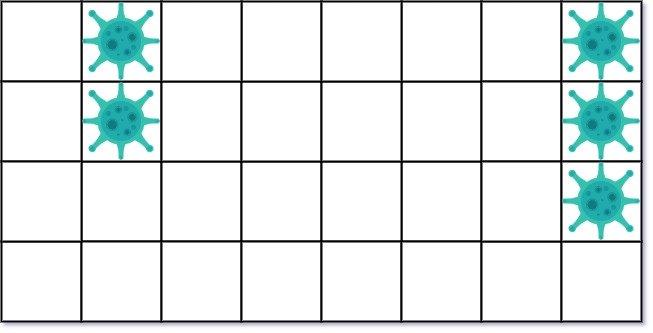


**Girdi:**


grid = 

[[0,1,0,0,0,0,0,1],[0,1,0,0,0,0,0,1],[0,0,0,0, 0,0,0,1],[0,0,0,0,0,0,0,0]] 

**Çıkış:** 10 

**Açıklama:** Kirlenmiş 2 bölge var. İlk gün soldaki viral bölgeyi karantinaya almak için 5 duvar ekleyin. Virüs bulaştıktan sonra tablo şöyle:

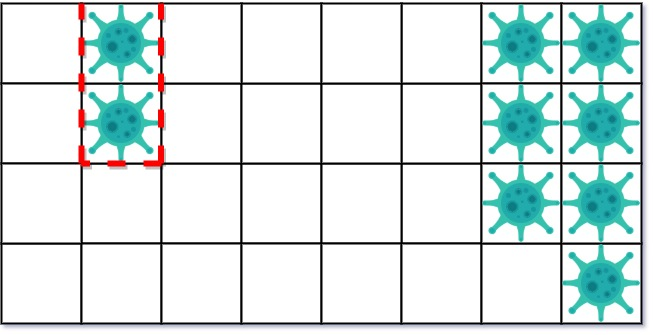

İkinci gün sağdaki viral bölgeyi karantinaya almak için 5 duvar ekleyin. Virüs tamamen kontrol altına alınmıştır.

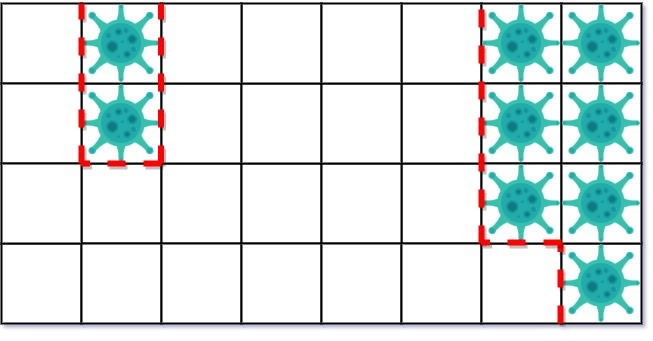


Örnek 2:

**Girdi:** 

grid = [[1,1,1],[1,0,1],[1,1,1]]

**Çıkış:** 4

In [ ]:
def print_matrix(matrix):
  print()
  print("MATRIX")
  print("------")
  for row in matrix:
    for cell in row:
      print(cell, end=" ")
    print()


def copy_matrix(grid):
    copy_grid = [[0 for i in range(len(grid[0]))] for j in range(len(grid))]
    for i in range(len(grid)):
      for j in range(len(grid[0])):
          copy_grid[i][j] = grid[i][j]
    return copy_grid


def matrix_contains_one(matrix):
  for row in matrix:
    for cell in row:
      if cell == 1:
        return 1
  return 0


def modify_matrix_possible_growing(grid):
  row_count = len(grid)
  column_count = len(grid[0])
  for i in range(row_count):
    for j in range(column_count):
      if grid[i][j] > 0:
        count = 0
        if i-1 >= 0 and grid[i-1][j] == 0:
          count += 1
        if j-1 >= 0 and grid[i][j-1] == 0:
          count += 1
        if i+1 < row_count and grid[i+1][j] == 0:
          count += 1
        if j+1 < column_count and grid[i][j+1] == 0:
          count += 1
        if count == 0:
            grid[i][j] = 9
        else:
            grid[i][j] = count


def solve(grid, stack, size):
  if len(stack) == 0:
    return size
  if stack[-1][0]+1 < len(grid) and grid[stack[-1][0]+1][stack[-1][1]] > 0:  # down
      if grid[stack[-1][0]+1][stack[-1][1]] != 9:
        size += grid[stack[-1][0]+1][stack[-1][1]]
      grid[stack[-1][0]+1][stack[-1][1]] = -1
      stack.append([stack[-1][0]+1, stack[-1][1]])
      return solve(grid, stack, size)
  elif stack[-1][1]+1 < len(grid[0]) and grid[stack[-1][0]][stack[-1][1]+1] > 0:  # right
      if grid[stack[-1][0]][stack[-1][1]+1] != 9:
        size += grid[stack[-1][0]][stack[-1][1]+1]
      grid[stack[-1][0]][stack[-1][1]+1] = -1
      stack.append([stack[-1][0], stack[-1][1]+1])
      return solve(grid, stack, size)
  elif stack[-1][1]-1 >= 0 and grid[stack[-1][0]][stack[-1][1]-1] > 0:  # left
      if grid[stack[-1][0]][stack[-1][1]-1] != 9:
        size += grid[stack[-1][0]][stack[-1][1]-1]
      grid[stack[-1][0]][stack[-1][1]-1] = -1
      stack.append([stack[-1][0], stack[-1][1]-1])
      return solve(grid, stack, size)
  elif stack[-1][0]-1 >= 0 and grid[stack[-1][0]-1][stack[-1][1]] > 0:  # up
      if grid[stack[-1][0]-1][stack[-1][1]] != 9:
        size += grid[stack[-1][0]-1][stack[-1][1]]
      grid[stack[-1][0]-1][stack[-1][1]] = -1
      stack.append([stack[-1][0]-1, stack[-1][1]])
      return solve(grid, stack, size)
  return solve(grid, stack[:-1], size)


def find_starting_point_of_next_contain(grid):
        #kodu buraya yazınız
        max_size = 0
        max_start = [0, 0]
        for i in range(len(grid)):
          for j in range(len(grid[0])):
            if grid[i][j] > 0:
              stack = []
              stack.append([i, j])
              size = grid[i][j]
              grid[i][j] = -1
              size = solve(grid, stack, size)
              if max_size < size:
                max_size = size
                max_start = [i, j]
        return max_start


def contain_and_grow(matrix, point):
  # containing
  stack = []
  stack.append(point)
  wall_c = 0
  if matrix[point[0]][point[1]] != 9:
    wall_c += matrix[point[0]][point[1]]
  matrix[point[0]][point[1]] = -1
  wall_c += solve(matrix, stack, 0)
  print_matrix(matrix)
  # growing
  copy_grid = copy_matrix(matrix)
  row_count = len(copy_grid)
  column_count = len(copy_grid[0])
  for i in range(row_count):
    for j in range(column_count):
      if matrix[i][j] > 0:
        if i-1 >= 0 and copy_grid[i-1][j] == 0:
          copy_grid[i-1][j] = 1
        if j-1 >= 0 and copy_grid[i][j-1] == 0:
          copy_grid[i][j-1] = 1
        if i+1 < row_count and copy_grid[i+1][j] == 0:
          copy_grid[i+1][j] = 1
        if j+1 < column_count and copy_grid[i][j+1] == 0:
          copy_grid[i][j+1] = 1

  for i in range(row_count):
    for j in range(column_count):
        matrix[i][j] = copy_grid[i][j]
  return wall_c


def containVirus(grid):
  #Kodunuzu buraya yazınız...
  wall_count = 0
  while matrix_contains_one(grid) == 1:
    print_matrix(grid)
    # viruslerin cogalabilecegi yerlerin sayilarini tut matrixte
    modify_matrix_possible_growing(grid)
    print_matrix(grid)
    # gruplandirip max olanin baslangic koordinatini kopya matrix uzerinde bul
    s = find_starting_point_of_next_contain(copy_matrix(grid))
    print(s)
    # -1 ile isaretle ve otekileri genislet
    wall_count += contain_and_grow(grid, s)
  return wall_count

        # wall_count = 0
        # row_count = len(grid)
        # column_count = len(grid[0])
        # for i in range(row_count):
        #   for j in range(column_count):
        #     if grid[i][j] == 0:
        #       if i-1 >= 0 and grid[i-1][j] == 1:
        #         wall_count += 1
        #       if j-1 >= 0 and grid[i][j-1] == 1:
        #         wall_count += 1
        #       if i+1 < row_count and grid[i+1][j] == 1:
        #         wall_count += 1
        #       if j+1 < column_count and grid[i][j+1] == 1:
        #         wall_count += 1
        # return wall_count

if __name__ == '__main__':
  grid = [[0,1,0,0,0,0,0,1],[0,1,0,0,0,0,0,1],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0]] 
  print(containVirus(grid))
  print(containVirus([[1,1,1],[1,0,1],[1,1,1]]))
  


MATRIX
------
0 1 0 0 0 0 0 1 
0 1 0 0 0 0 0 1 
0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 

MATRIX
------
0 2 0 0 0 0 0 1 
0 3 0 0 0 0 0 1 
0 0 0 0 0 0 0 2 
0 0 0 0 0 0 0 0 
[0, 1]

MATRIX
------
0 -1 0 0 0 0 0 1 
0 -1 0 0 0 0 0 1 
0 0 0 0 0 0 0 2 
0 0 0 0 0 0 0 0 

MATRIX
------
0 -1 0 0 0 0 1 1 
0 -1 0 0 0 0 1 1 
0 0 0 0 0 0 1 2 
0 0 0 0 0 0 0 1 

MATRIX
------
0 -1 0 0 0 0 1 9 
0 -1 0 0 0 0 1 9 
0 0 0 0 0 0 2 9 
0 0 0 0 0 0 0 1 
[0, 6]

MATRIX
------
0 -1 0 0 0 0 -1 -1 
0 -1 0 0 0 0 -1 -1 
0 0 0 0 0 0 -1 -1 
0 0 0 0 0 0 0 -1 
10

MATRIX
------
1 1 1 
1 0 1 
1 1 1 

MATRIX
------
9 1 9 
1 0 1 
9 1 9 
[0, 0]

MATRIX
------
-1 -1 -1 
-1 0 -1 
-1 -1 -1 
4
